# My Project 3: Exploring GapMinder Data
### Will Rodman | Data Science | November 2023

In the third and final project assignment for Tulane Universities Data Science class, I look into linear regression using from [gapminder.org](https://www.gapminder.org/).

I'll be working with a dataset on [GitHub page](https://github.com/jennybc/gapminder).


## Project Start

Before anything, project packages and libraries are installed. 

In [1]:
# Importing packages.  
%pip install requests pandas matplotlib sklearn numpy scipy statsmodels --quiet

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing libraries. 
import pandas as pd
import requests
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm


In [3]:
# Downloading data from github.
url = 'https://raw.githubusercontent.com/jennybc/gapminder/main/data-raw/08_gap-every-five-years.tsv'
response = requests.get(url)

if response.status_code != 200:
    print("Url Request Failed.")

In [4]:
# Loading data into Pandas DataFrame. 
df = pd.read_csv(StringIO(response.text), sep='\t')
print(df.shape)
df.head()

(1704, 6)


,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


## Part 1: Exploring Life Expectancy Changes and Economic Measures

In Part 1 of this project, I focus is on understanding how life expectancy has evolved globally over a 50-year period and exploring its relationship with economic indicators such as GDP.

### Exercise 1: Visualizing Life Expectancy

Text(0.5, 1.0, 'Life Expectancy Across Time')

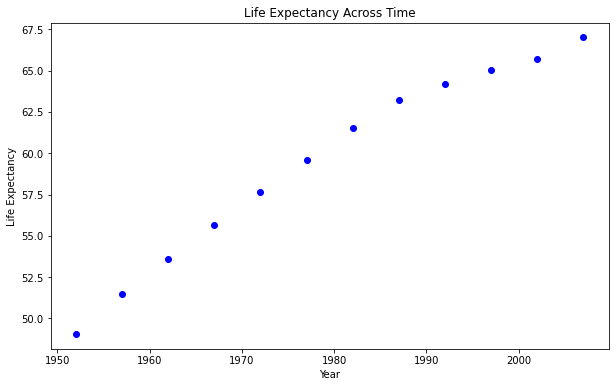

In [5]:
# Scatter plot of life expectancy across time
plt.figure(figsize=(10, 6))
group_df = df.groupby('year')
plt.scatter(group_df['year'].unique(), group_df['lifeExp'].mean(), c='blue')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Across Time')

### Question 1: Analyzing Life Expectancy Trends

Based on the scatter plot, there's a trend in life expectancy over time. This trend in increasing and appears to be linear. 

### Visualizing Life Expectancy with a Violin Plot

Text(0.5, 1.0, 'Violin Plot of Life Expectancy Across Time')

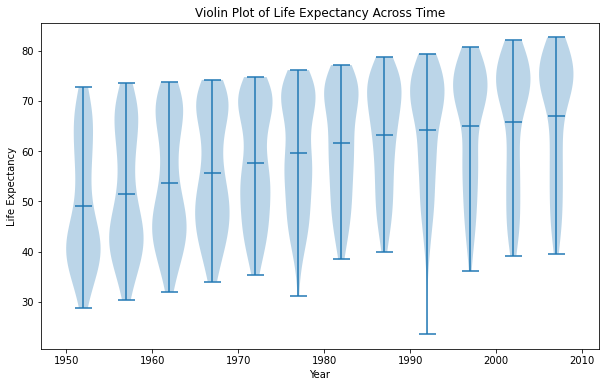

In [6]:
# Wrangling data for plot. 
plt.figure(figsize=(10, 6))
life_exp_per_year = df.groupby('year')['lifeExp'].apply(list).reset_index(name='values')
y =life_exp_per_year['values'].to_list()
x = life_exp_per_year['year'].to_list()

plt.violinplot(y, x, widths=4, showmeans=True)
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.title("Violin Plot of Life Expectancy Across Time")



### Question 2: Describing Life Expectancy Distribution

Based on the violin plot, the range of each sample dist. remain consistent over time. However, the skew appear to transition from a positive skew to a negative skew as time increases. Always remaining unimodal, but never symmetric around its center.

### Question 3: Intuition on Linear Regression

Using my own intuition, I believe there could be a linear relationship modeled because the center of each dist. displays an increasing trend over time. In this case, the null hypothesis would be rejected in favor of the alternative hypothesis. 

### Understanding Model Residuals

The next set of questions revolves around model residuals, which are the errors in every prediction made by the model. 

### Question 4: Intuition on Residuals Violin Plot

Considering the violin plots over time transition from a negative to positive skew. I believe departures from the model would occur above the model line at the beginning of time, then occur below the model line at the end of time. 

### Question 5: Assumptions of Linear Regression Model

A perfect linear regression would have residuals that are symmetrically distributed around the mean for each instance of the independent (ie: year) variable, and a violin plot would display a balanced distribution. However our violin plot displays skews, so there will not be a perfect relationship between the variables. Because our model has only one input variable and is linear, this means there is noise we cannot predict for and an "S" pattern of residuals may form along the model line. 

### Exercise 5: Scatter plot and Regression Line.


In [7]:
X = df[['year']]
y = df['lifeExp']

model = LinearRegression()
model.fit(X, y)

print("Linear Regression Model Parameters:")
print(f'Intercept (B0): {model.intercept_}')
print(f'Coefficient for year (B1): {model.coef_[0]}')


Linear Regression Model Parameters:
Intercept (B0): -585.6521874415448
Coefficient for year (B1): 0.3259038276371518


### Question 6: Understanding the Model

Life expectancy increased approximately 0.33 years per calender year. This is printed above as the B1 coefficient. 

### Question 6: Model Relationship

Because the coefficient B1 is not equal to zero. I would reject the null hypothesis in favor of the alternative hypothesis, that being, a relationship between life expectancy and calender year. 

### Exercise 3: Violin Plot

Text(0.5, 1.0, 'Violin Plot of Residual Errors Over Time')

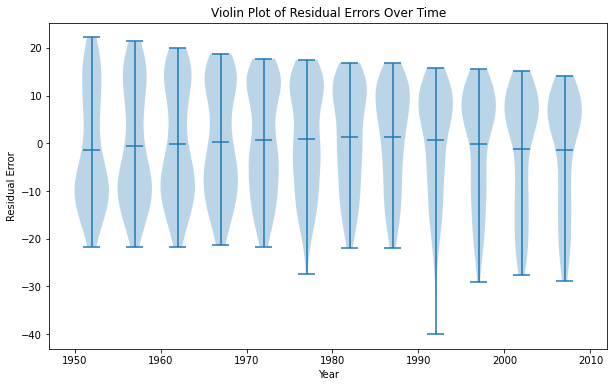

In [8]:
# Calculate residuals.
df['residuals'] = y - model.predict(X)

# Wrangling data for plot. 
plt.figure(figsize=(10, 6))
residuals_per_year = df.groupby('year')['residuals'].apply(list).reset_index(name='values')
y = residuals_per_year['values'].to_list()
x = residuals_per_year['year'].to_list()

plt.violinplot(y, x, widths=4, showmeans=True)
plt.xlabel("Year")
plt.ylabel("Residual Error")
plt.title("Violin Plot of Residual Errors Over Time")

### Question 8: Looking at My Intuition

I was half correct, the farthest departures from the model happen below the regression line at the end of calender years.

### Exercise 4: Violin Plot by Continent

/var/folders/rq/9zvkr67d2mx07n6md37__xcr0000gn/T/ipykernel_4911/2681636534.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (con, data) in enumerate(df.groupby(['continent'])):


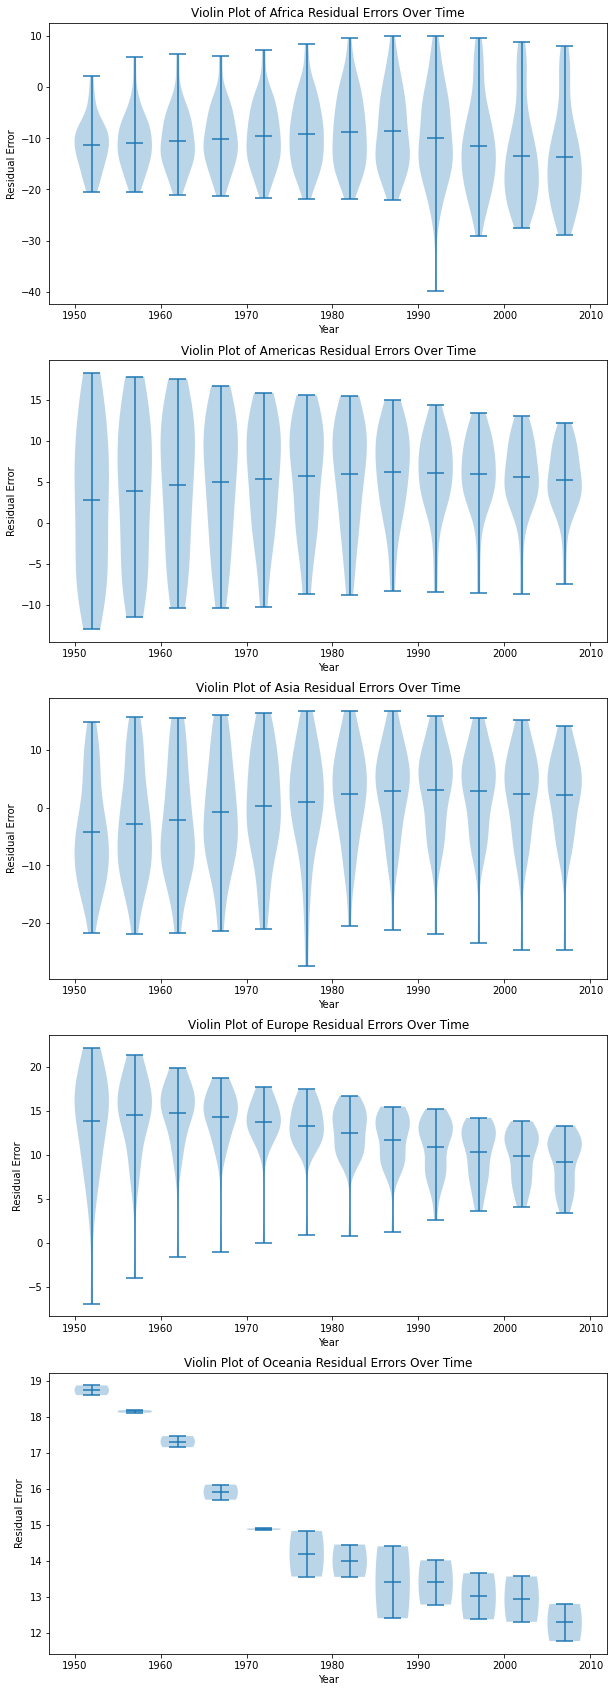

In [9]:
fig, axes = plt.subplots(5, 1, figsize=(10, 30))

for i, (con, data) in enumerate(df.groupby(['continent'])):

    # Wrangling data for plot.
    residuals_per_year = data.groupby('year')['residuals'].apply(list).reset_index(name='values')
    y = residuals_per_year['values'].to_list()
    x = residuals_per_year['year'].to_list()

    axes[i].violinplot(y, x, widths=4, showmeans=True)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Residual Error")
    axes[i].set_title(f"Violin Plot of {con} Residual Errors Over Time")


### Question 9: Dependence

There is a large dependency between model residual and continent (specifically look at Europe and Oceania). This suggest that a linear regression categorized by continent would be more accurate. 

### Exercise 5: Scatter plot of life expectancy vs. year grouped by continent

/var/folders/rq/9zvkr67d2mx07n6md37__xcr0000gn/T/ipykernel_4911/3468352950.py:10: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for con, data in df.groupby(['continent']):


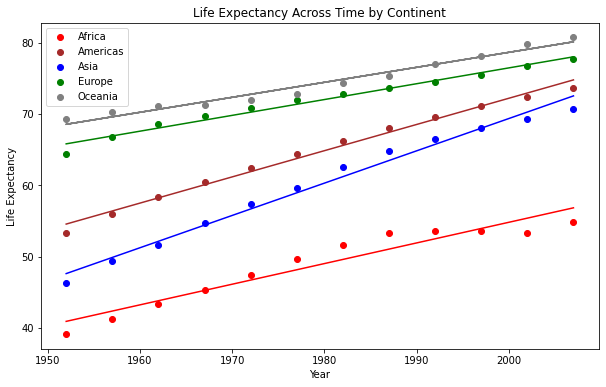

In [10]:
colors = {'Africa': 'red',
          'Asia': 'blue',
          'Europe': 'green',
          'Americas': 'brown',
          'Oceania': 'grey'
              }

# Plotting data by continent.
plt.figure(figsize=(10, 6))
for con, data in df.groupby(['continent']):
    group_df = data.groupby('year') 
    plt.scatter(group_df['year'].unique(), group_df['lifeExp'].mean(), label=con, c=colors[con])
    
    # Linear regression line
    X_continent = data['year'].to_numpy().reshape(-1, 1)  
    y_continent = data['lifeExp'].to_numpy()
    model.fit(X_continent, y_continent)
    plt.plot(X_continent, model.predict(X_continent), color=colors[con])

plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Across Time by Continent')
plt.legend()
plt.show()

### Bonus Question 10!!!

Yes, there should an interaction term for continent and year. This is because there is a clear dependent relationship between continent catagories seen in the slope intercepts. 

### Bonus Question 11!!!

In [11]:

# Create PolynomialFeatures and LinearRegression models
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

for con, data in df.groupby(['continent']):
    group_df = data.groupby('year')
    
    # Create polynomial features, including interaction term
    X_continent = group_df['year'].unique().to_numpy().reshape(-1, 1)
    y_continent = group_df['lifeExp'].mean()

    X_poly = poly.fit_transform(X_continent)
        
    model.fit(X_poly, y_continent)
    
    print(f'\nCoefficients for {con}:')
    print(model.coef_[0])


Coefficients for Africa:
0.2895292630446476

Coefficients for Americas:
0.3676509370629368

Coefficients for Asia:
0.453122403899131

Coefficients for Europe:
0.22193214452214433

Coefficients for Oceania:
0.21027237762237752


/var/folders/rq/9zvkr67d2mx07n6md37__xcr0000gn/T/ipykernel_4911/2622281832.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for con, data in df.groupby(['continent']):


## Part 2: Classification and Model Selection

For this project, I'll be working with the [fetch_california_housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) dataset from Sklearn. I chose this dataset because it involves regression prediction,  the type of prediction I'll be working with for my final project. In the context of regression, I'll be using the Decision Tree and Random Forest models for prediction. 

**Decision Tree:** tree-like model of questions about the features.

**Random Forest** an ensemble model method that builds multiple Decision Trees.

In [12]:
# Import necessary libraries.
from scipy.stats import ttest_rel

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

Loading the data from Sklearn into train and test variables.

In [17]:
# Load the housing dataset.
data = fetch_california_housing()
df2 = pd.DataFrame(data.data, columns=data.feature_names)

# Split  data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(df2, data.target, test_size=0.3, random_state=42)

print("y:", data.target[:5])
print("X:", df2.head())

y: [4.526 3.585 3.521 3.413 3.422]
X:    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


Training the two models. 

In [18]:
# Sample two regressions.
regressors = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Train models.
for name, regressor in regressors.items():
    regressor.fit(X_train, y_train)

Finally evaluation how the two models perform. Because this is a regression analysis, I will be using the Root Mean Square Error equation to measure accuracy. 

In [20]:
regressor_cv_rmse_scores = list()

for name, regressor in regressors.items():
    print(f"\n{name} Regressor:")
    y_pred = regressor.predict(X_test)

    # Mean squared error. 
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"    Mean Squared Error (MSE): {mse}")
    print(f"    Root Mean Squared Error (RMSE): {rmse}")

    # Cross-validation for additional comparison
    cv_scores = cross_val_score(regressor, df2, data.target, cv=10, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_scores)
    regressor_cv_rmse_scores.append(cv_rmse_scores)

    print(f"    Cross-Validation Values:", cv_scores)
    print(f"    Mean RMSE: {np.mean(cv_rmse_scores)}")


Decision Tree Regressor:
    Mean Squared Error (MSE): 0.5280096503174904
    Root Mean Squared Error (RMSE): 0.7266427253592307
    Cross-Validation Values: [-1.21135398 -0.76611675 -0.71643382 -0.4978003  -0.78924236 -0.84220232
 -0.55256812 -1.02057649 -1.03621216 -0.55164701]
    Mean RMSE: 0.8848238571867985

Random Forest Regressor:
    Mean Squared Error (MSE): 0.25650512920799395
    Root Mean Squared Error (RMSE): 0.5064633542597075


Looking at performance of the Decision Tree and Random Forest regressors, the **Random Forest** model does better then the Decision Tree model. The Random Forest Regressor demonstrates higher accuracy with a lower RMSE of about 0.50, compared to the Decision Tree's RMSE of 0.72. Cross-validation seconded this by showing the same performance across different folds. 

### Bonus!!! Cross-validation paired t-test

In [ ]:
# Paired t-test.
t_statistic, p_value = ttest_rel(regressor_cv_rmse_scores[0], regressor_cv_rmse_scores[1])

print(f"T-statistic: {t_statistic}")
print("P-value: {:.10f}".format(p_value))

if p_value < 0.05:
    print("p-val <= 0.05: statistically significant.")
else:
    print("p-val > 0.05: no significant difference.")

T-statistic: 21.337264124336592
P-value: 0.0000000051
p-val <= 0.05: statistically significant.
